<a href="https://colab.research.google.com/github/RecentResearchSuggests/hello-world/blob/master/Chollet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow-gpu
from keras import models
from keras import layers
import numpy as np

     |████████████████████████████████| 377.0MB 75kB/s 


Using TensorFlow backend.


In [4]:
# Simple Convnet of three layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [5]:
from keras.datasets import mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

11493376/11490434 [==============================] - 2s 0us/step


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5
60000/60000 [==============================] - 10s 165us/step - loss: 0.1722 - acc: 0.9463
Epoch 2/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.0464 - acc: 0.9859
Epoch 3/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.0319 - acc: 0.9901
Epoch 4/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.0240 - acc: 0.9923
Epoch 5/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.0189 - acc: 0.9940


The fundamental difference between a densely connected layer and a convolution layer is this: Dense layers learn global patterns in their input feature space (for example, for a MNIST digit, patterns involving all pixels, whereas convolution layers learn local patterns (see figure 5.1): in the case of images, patterns found in small 2D windows of the inputs.
#### Key characteristics of convnets

Translation invariant patterns: Patterns recognized in bottom right of image can be recognized in top right. The pattern is different from the location of the pattern

Spatial hierarchy of patterns: Patterns are layered such that small patterns of curves, lines, eyes, etc. make up the larger image of a cat.

Depth axis for images is channels, such as R, G, and B for RGB photos. For black and white depth is 1.

Padding: and "same", which means “pad in such a way as to have an output with the same width and height as the input.” Conv. networks only can center their feature maps on non-edge values of tensors. Therefore padding is employed so each filter can center around places on each edge.

### MaxPooling
Maximizes outputs from feature maps so that the closest-to-zero values go away due to the max function.




In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 55us/step


In [16]:
!pip install kaggle --upgrade

     |████████████████████████████████| 61kB 31.0MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=9b88f38d33ffdcbb9f0187385277ef5a95ecaaae84cc5bf7ef4f20b114df6e95
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.5
    Uninstalling kaggle-1.5.5:
      Successfully uninstalled kaggle-1.5.5


In [0]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/.kaggle"

In [0]:
!mkdir .kaggle

In [0]:
import json
token = {"username":"aglaserschoff", "key":"dc73904eaa6cf9ea6f30189a887cc528"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

cp: cannot create regular file '/root/.kaggle/kaggle.json': No such file or directory


In [25]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [22]:
!unzip \*.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: train.zip               
  inflating: test1.zip               


In [27]:
!unzip \*.zip

MessageError: ignored

In [33]:
!ls 

dogs-vs-cats.zip  sampleSubmission.csv	test1.zip  train.zip
sample_data	  test1			train


In [0]:
import os, shutil


In [0]:
original_dataset_dir = '/content/train/'

In [0]:
original_dataset_dir = '/content/train/'
base_dir = '/content/cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


In [0]:
#Copy first 1000 cat training files to small_cats_and_dogs/cats/train 
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join('/content/train', fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src,dst)

In [0]:
# Copy 1000 through 1500 to validation set in small_cats_and_dogs
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join('/content/train', fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
# Copies next 500 cats to testing data set
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join('/content/train', fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

In [0]:
# Do the same for dogs
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [39]:
# How many images in each dir
print('Total training cat images (for small dir): ', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('Total testing cat images:', len(os.listdir(test_cats_dir)))
print('Total testing dog images:', len(os.listdir(test_dogs_dir)))

Total training cat images (for small dir):  1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
Total testing cat images: 500
Total testing dog images: 500


In [40]:
!ls 

cats_and_dogs_small  sample_data	   test1      train
dogs-vs-cats.zip     sampleSubmission.csv  test1.zip  train.zip


In [0]:
# Making a small conv net to use for images
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 128)      

In [0]:
# Use binary because two classifications, use crossentropy and sigmoid last layer
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

In [48]:
# Goal of preprocessing

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    # Rescale images to 150 by 150
    target_size=(150, 150),
    # Do in this batch size
    batch_size=20,
    # Classify in binary set
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# Generator acts as iterator but as an object

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [49]:
# Make a break loop that stops the genearator from going indefinately
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [50]:
# Train a model similar to previous chapters but this time with generator function
history = model.fit_generator(
    train_generator,
    # Steps per epoch determined by batch size. Batch size of 20 determines that
    #  100 steps_per_epoch then trains 2000 total images.
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 9s 90ms/step - loss: 0.6859 - acc: 0.5475 - val_loss: 0.6677 - val_acc: 0.5700
Epoch 2/30
100/100 [==============================] - 8s 80ms/step - loss: 0.6602 - acc: 0.6015 - val_loss: 0.6455 - val_acc: 0.6190
Epoch 3/30
100/100 [==============================] - 8s 81ms/step - loss: 0.6103 - acc: 0.6800 - val_loss: 0.6159 - val_acc: 0.6550
Epoch 4/30
100/100 [==============================] - 8s 80ms/step - loss: 0.5679 - acc: 0.7160 - val_loss: 0.6043 - val_acc: 0.6590
Epoch 5/30
100/100 [==============================] - 8s 80ms/step - loss: 0.5344 - acc: 0.7305 - val_loss: 0.5756 - val_acc: 0.6800
Epoch 6/30
100/100 [==============================] - 8s 80ms/step - loss: 0.5049 - acc: 0.7480 - val_loss: 0.6111 - val_acc: 0.6810
Epoch 7/30
100/100 [==============================] - 8s 79ms/step - loss: 0.4683 - acc: 0.7755 - val_loss: 0.5625 - val_acc: 0.6960
Epoch 8/30
100/100 [==============================] - 8s 79ms/step - 

In [0]:
model.save('cats_and_dogs_small_1.h5')

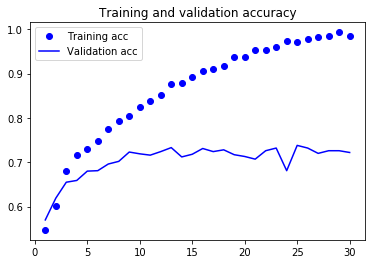

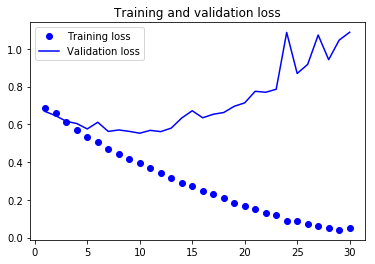

In [52]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# Make some random transformations for data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

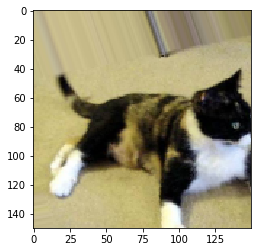

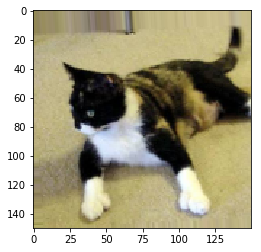

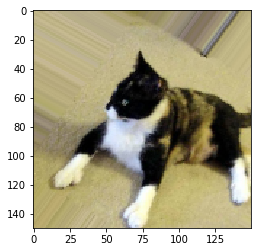

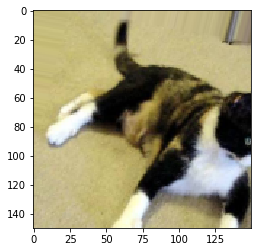

In [80]:
# View some of the newly augmented images
# Import appropriate image-processing package
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
    fname in os.listdir(train_cats_dir)]

img_path = fnames[389]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

# Make a chart for each of (4) transformations.
# loops indefiniately (due to generator object)
# so break at some point
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
      break

plt.show()

In [0]:
# New model that includes dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',

optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [0]:
# Train the convnet using data-augmentation

train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
# Don't augment validation data!!!!
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150, 150),
  batch_size=32,
  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150, 150),
  batch_size=32,
  class_mode='binary')

history = model.fit_generator(
  train_generator,
  steps_per_epoch=100,
  epochs=100,
  validation_data=validation_generator,
  validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 27s 274ms/step - loss: 0.6926 - acc: 0.5291 - val_loss: 0.6758 - val_acc: 0.5939
Epoch 2/100
100/100 [==============================] - 24s 242ms/step - loss: 0.6796 - acc: 0.5719 - val_loss: 0.6619 - val_acc: 0.6031
Epoch 3/100
100/100 [==============================] - 24s 243ms/step - loss: 0.6550 - acc: 0.6022 - val_loss: 0.6964 - val_acc: 0.5577
Epoch 4/100
100/100 [==============================] - 24s 243ms/step - loss: 0.6452 - acc: 0.6216 - val_loss: 0.6241 - val_acc: 0.6488
Epoch 5/100
100/100 [==============================] - 24s 236ms/step - loss: 0.6143 - acc: 0.6619 - val_loss: 0.6039 - val_acc: 0.6732
Epoch 6/100
100/100 [==============================] - 26s 258ms/step - loss: 0.6008 - acc: 0.6759 - val_loss: 0.5760 - val_acc: 0.7036
Epoch 7/100
100/100 [==============================] - 24s 244ms/step - loss: 0.5954 - acc: 0.6719 -

In [0]:
model.save('cats_and_dogs_small_2.h5')

# Feature Extraction

Feature extraction consists of using the representations learned by a previous network
to extract interesting features from new samples. These features are then run through
a new classifier, which is trained from scratch.